In [75]:
import numpy as np
import pandas as pd

In [76]:
weather_data = pd.read_csv("weather_data_nyc_centralpark_2016(1).csv")
weather_data["date"] = pd.to_datetime(weather_data.date, dayfirst=True)
weather_data[weather_data["date"] < "2016-02-01"]

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,2016-01-01,42,34,38.0,0.00,0.0,0
1,2016-01-02,40,32,36.0,0.00,0.0,0
2,2016-01-03,45,35,40.0,0.00,0.0,0
3,2016-01-04,36,14,25.0,0.00,0.0,0
4,2016-01-05,29,11,20.0,0.00,0.0,0
5,2016-01-06,41,25,33.0,0.00,0.0,0
6,2016-01-07,46,31,38.5,0.00,0.0,0
7,2016-01-08,46,31,38.5,0.00,0.0,0
8,2016-01-09,47,40,43.5,T,0.0,0
9,2016-01-10,59,40,49.5,1.80,0.0,0


In [77]:
january_dates = weather_data["date"][weather_data["date"] < "2016-02-01"]
january_avg_temp = weather_data[weather_data["date"] < "2016-02-01"]["average temperature"]

In [78]:
%matplotlib inline

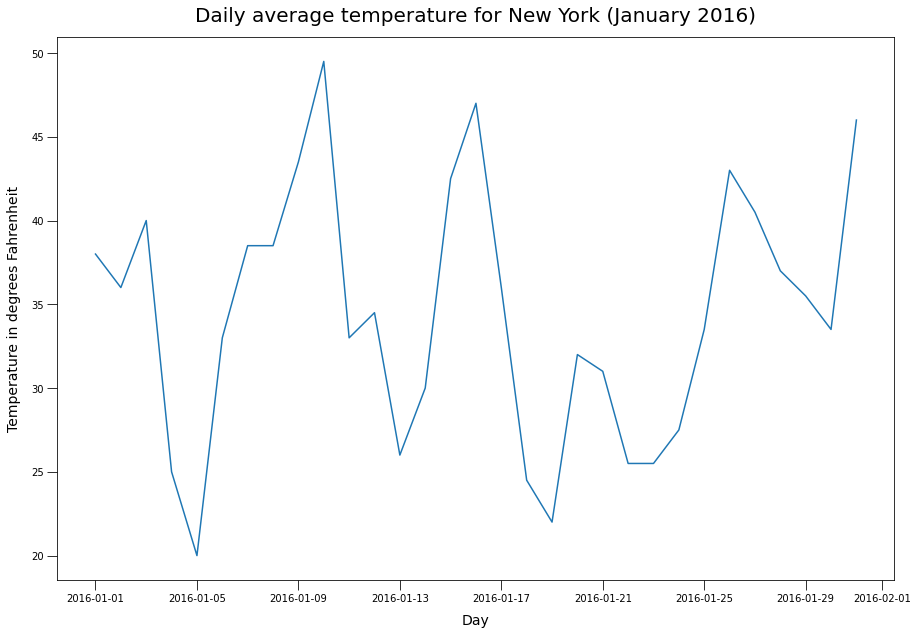

In [115]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(january_dates, january_avg_temp)
ax.set_title("Daily average temperature for New York (January 2016)", pad=15, fontsize=20)
ax.set_ylabel("Temperature in degrees Fahrenheit", fontsize=14, labelpad=10)
ax.set_xlabel("Day", fontsize=14, labelpad=10)
ax.tick_params(labelsize=10, length=10)


In [85]:
from scipy.optimize import curve_fit

In [104]:
def trigonometric_fit(temperature_data: pd.Series, a: float, b: float, c: float) -> pd.Series:
    return a * np.cos(2 * np.pi * temperature_data + b) + c


In [116]:
popt, pcov = curve_fit(trigonometric_fit, np.linspace(0, 31, len(january_dates)), january_avg_temp)
print(popt)
print(len(january_dates))

ax.plot(january_dates, trigonometric_fit(january_avg_temp, popt[0], popt[1], popt[2]))
fig.savefig("figure.jpg")

[ 2.94151743 -1.0095179  34.40110715]
31


In [138]:
date, temperature = np.loadtxt("weather_data_nyc_centralpark_2016(1) copy.txt",usecols=(0, 3),
                               unpack=True, delimiter=",", dtype=(str, float), skiprows=1)
date

array(['1-', '2-', '3-', '4-', '5-', '6-', '7-', '8-', '9-', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '1-', '2-',
       '3-', '4-', '5-', '6-', '7-', '8-', '9-', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '1-', '2-', '3-', '4-', '5-', '6-',
       '7-', '8-', '9-', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '30', '31', '1-', '2-', '3-', '4-', '5-', '6-', '7-', '8-',
       '9-', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '1-', '2-', '3-', '4-', '5-', '6-', '7-', '8-', '9-', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '3